In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/marketing_campaign.csv',delimiter = '\t')

# Preprocessing steps

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print("Missing data in the data frame:")
print(df.isnull().sum())

Missing data in the data frame:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
df = df.dropna()

The dataset contains various types of information about customers. The aim is to cluster clients into several groups to better target the campaign. By analyzing this data, we will gain a better understanding of customer behavior, allowing us to target the campaign more effectively. This approach ensures that we focus on customers who are likely to make a purchase again, tailoring the campaign to better suit their needs.

Here is the explanation what different attributes mean:

People:
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products:

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion:

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place:

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

The dataset contains 29 attributes in columns, 25 of them are integer type, three are object type and one is float type. The attributes are divided into four sections: People, Products, Promotion and Place. As every observation contains 29 attributes, I will divide the columns into these four sections and perform descriptive statistics. 

In [7]:
# Descriptive statistics - 1st section: People

In [8]:
df.loc[:,['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','Complain']].describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
count,2216.000000,2216.000000,2216,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,662,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN
freq,NaN,NaN,1116,857,NaN,NaN,NaN,12,NaN,NaN
mean,5588.353339,1968.820397,NaN,NaN,52247.251354,0.441787,0.505415,NaN,49.012635,0.009477
std,3249.376275,11.985554,NaN,NaN,25173.076661,0.536896,0.544181,NaN,28.948352,0.096907
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,2814.750000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,0.000000
75%,8421.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,0.000000


I've used method describe(include='all') because in the 1st section we have some categorical columns ('Education' and 'Marital Status') and for those columns we will have additional statistics: unique, top and frequency.  

We can see from here that the 'ID' column and 'Dt_Customer' column can be safely dropped as ID number and date of customer's enrollment with the company shouldn't really be important during customer clustering. The other attributes might be important that's why I will keep them. 

In [9]:
df = df.drop(['ID','Dt_Customer'], axis = 1)

In [10]:
# Descriptive statistics - 2nd section: Products

In [11]:
df.loc[:,['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [12]:
# Descriptive statistics - 3rd section: Promotion

In [13]:
df.loc[:,['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].describe()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,0.064079,0.013538,0.073556,0.074007,0.073105
std,1.923716,0.244950,0.115588,0.261106,0.261842,0.260367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Descriptive statistics - 4th section: Place

In [15]:
df.loc[:,['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,4.085289,2.671029,5.800993,5.319043
std,2.740951,2.926734,3.250785,2.425359
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,3.000000
50%,4.000000,2.000000,5.000000,6.000000
75%,6.000000,4.000000,8.000000,7.000000
max,27.000000,28.000000,13.000000,20.000000


To cluster the customers we will be using K-Means algorithm. Before we use it, we need to convert categorical variables to numeric values using One Hot Encoding. We also need to standarize the numerical features.

In [16]:
df_encoded = pd.get_dummies(df, columns=['Education','Marital_Status'])

In [17]:
df_encoded.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

We can see here that columns 'Education' and 'Marital Status' have been split into more columns, each of new created columns have boolean data type.

In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2216 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2216 non-null   int64  
 3   Teenhome                 2216 non-null   int64  
 4   Recency                  2216 non-null   int64  
 5   MntWines                 2216 non-null   int64  
 6   MntFruits                2216 non-null   int64  
 7   MntMeatProducts          2216 non-null   int64  
 8   MntFishProducts          2216 non-null   int64  
 9   MntSweetProducts         2216 non-null   int64  
 10  MntGoldProds             2216 non-null   int64  
 11  NumDealsPurchases        2216 non-null   int64  
 12  NumWebPurchases          2216 non-null   int64  
 13  NumCatalogPurchases      2216 non-null   int64  
 14  NumStorePurchases        2216

K-Means algorithm requires standarizing the data. 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Selecting the numerical columns to scale 
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [21]:
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Now the scaled values replace the original values in the DataFrame.

In [22]:
df_encoded

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,False,False,False,False,False,False,True,False,False,False
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,False,False,False,False,False,False,True,False,False,False
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,False,False,False,False,False,False,False,True,False,False
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,False,False,False,False,False,False,False,True,False,False
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.151917,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,False,False,False,False,False,True,False,False,False,False
2236,-1.904422,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,False,True,False,False,False,False,False,True,False,False
2237,1.016420,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,False,False,False,False,True,False,False,False,False,False
2238,-1.069896,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,True,False,False,False,False,False,False,True,False,False


In [23]:
# Determining the optimal number of clusters using Silhouette Score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

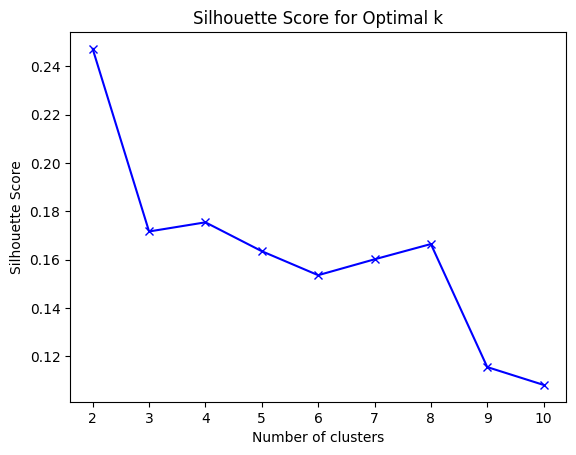

In [24]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


The Silhouette Score suggests that the optimal number of clusters is two (k = 2). 

Let's check the optimal number of clusters using Elbow Method. The Elbow Method is based on the idea that adding more clusters should reduce the sum of squared distances (inertia) between data points and their respective cluster centroids. 

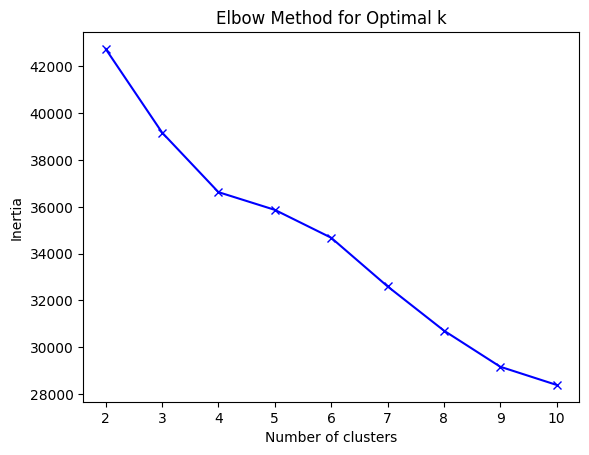

In [25]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)  
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


The Elbow Metod also points out that the best number of clusters should be two (k=2). 

In [26]:
df_encoded.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [27]:
# Application of K-Means Algorithm

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(df_encoded)

In [28]:
# Getting the predictions

predictions = kmeans.predict(df_encoded)

In [29]:
# Understanding the clusters' characteristics

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_encoded.columns)
cluster_centers


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.097757,-0.520202,0.458712,0.098851,-0.008078,-0.585440,-0.492506,-0.574902,-0.508020,-0.490501,...,0.176471,0.205510,-7.155734e-18,2.233805e-03,0.098287,0.399106,0.211467,0.259121,0.028295,1.489203e-03
1,-0.150387,0.800265,-0.705670,-0.152070,0.012426,0.900626,0.757658,0.884414,0.781525,0.754573,...,0.146621,0.234822,2.290951e-03,-4.336809e-19,0.114548,0.367698,0.214204,0.257732,0.043528,-4.228388e-18


Each row represents the centroid of one cluster and each column corresponds to one of the features in my dataset. The values are standarized, meaning that they have been transformed to have a mean of 0 and a standard deviation of 1. We can interprete every single column and since there are a lot of columns, I will do it for few first columns. 
Cluster O: 'Year_Birth' - the value is above the mean indicating that in this cluster customers are older then in the other one.
'Income' - the value is below the mean indicating that in this cluster customers earn less than in the other one.
'Kidhome' - the value is above mean indicating that in this cluster customers have more kids at home than in the other one. 

Cluster 1: 'Year_Birth' - the value is below the mean indicating that in this cluster customers are younger then in the other one.
'Income' - the value is above the mean indicating that in this cluster customers earn more than in the other one.
'Kidhome' - the value is below mean indicating that in this cluster customers have fewer kids at home than in the other one. 

And we can continue the analysis for other features. 

As a result, we can say that the 'Cluster 0' represents slightly older individuals with lower income, more children at home and lower spendings in most product categories, whereas the 'Cluster 1' represents slightly younger, higher-income individuals with fewer kids at home and higher spending across multiple categories. 

In [30]:
# Here, I create additional column 'Cluster' indicating to which cluster a customer belongs. For a better understanding, I am displaying
# only first 10 columns and a label in a column 'Cluster'. 

df_encoded['Cluster'] = cluster_labels

columns_to_display = df_encoded.columns[:10].tolist() + [df_encoded.columns[-1]]

df_subset = df_encoded[columns_to_display].head(10)
df_subset

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,Cluster
0,-0.986443,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,1
1,-1.236801,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,0
2,-0.318822,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,1
3,1.266777,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,0
4,1.016420,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,0
5,-0.151917,0.407899,-0.823039,0.909066,-1.140655,0.637234,0.393213,-0.307698,-0.687574,0.364591,1
6,0.181894,0.134609,-0.823039,0.909066,-0.518718,-0.207832,0.971321,-0.013361,0.225839,0.535062,1
7,1.350230,-0.746730,1.039938,-0.928972,-0.587822,-0.679290,-0.411112,-0.495003,-0.632770,-0.633880,0
8,0.432251,-0.870025,1.039938,-0.928972,-1.036999,-0.863128,-0.662463,-0.637712,-0.632770,-0.585174,0
9,-1.570611,-1.851572,1.039938,0.909066,0.656053,-0.821616,-0.662463,-0.717986,-0.669306,-0.633880,0


# Evaluation metrics

In [33]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score 

# Calculating the Silhouette Score
silhouette_score_value = silhouette_score(df_encoded, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_encoded, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_encoded, predictions)

In [39]:
print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.2542182558932106
Calinski-Harabasz Score: 612.7619496548303
Davies-Bouldin Score: 1.7775300851740514


The outcomes of evaluation metrics suggest that the clusters are not ideal, but are not bad either. 

A Silhouette Score of 0.254 suggests that the clusters might be overlapping, indicating that the clustering could be improved. A score close to 1 indicates well-separated clusters. A score around 0 suggests overlapping clusters. 

Calinski-Harabasz Score of 612.76 is not saying much until is compared with other numbers of clusters.

Davies-Bouldin Score is moderate. Ideal scores are closer to 0, indicating better cluster separation. A score around 1 and higher, as in this case, suggests that the clusters might not be really well-separated.


In [41]:
# Reducing dimensions to 2D using PCA 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop('Cluster', axis=1))

# Create a DataFrame with the PCA results and cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_encoded['Cluster']


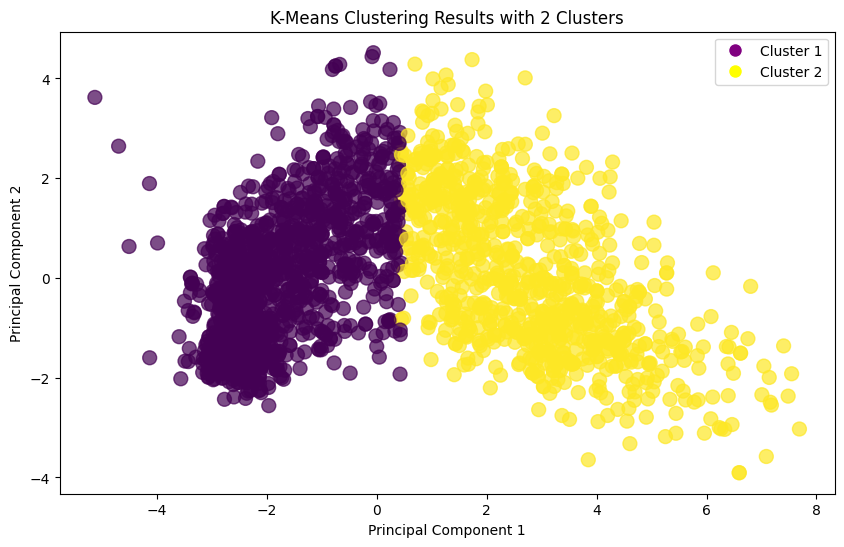

In [52]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
plt.scatter(x='PCA1', y='PCA2', c=predictions, data=df_pca, s=100, alpha=0.7)

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 1'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Cluster 2')]

plt.title('K-Means Clustering Results with 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=legend_elements,labels=['Cluster 1','Cluster 2'])
plt.show()
